In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

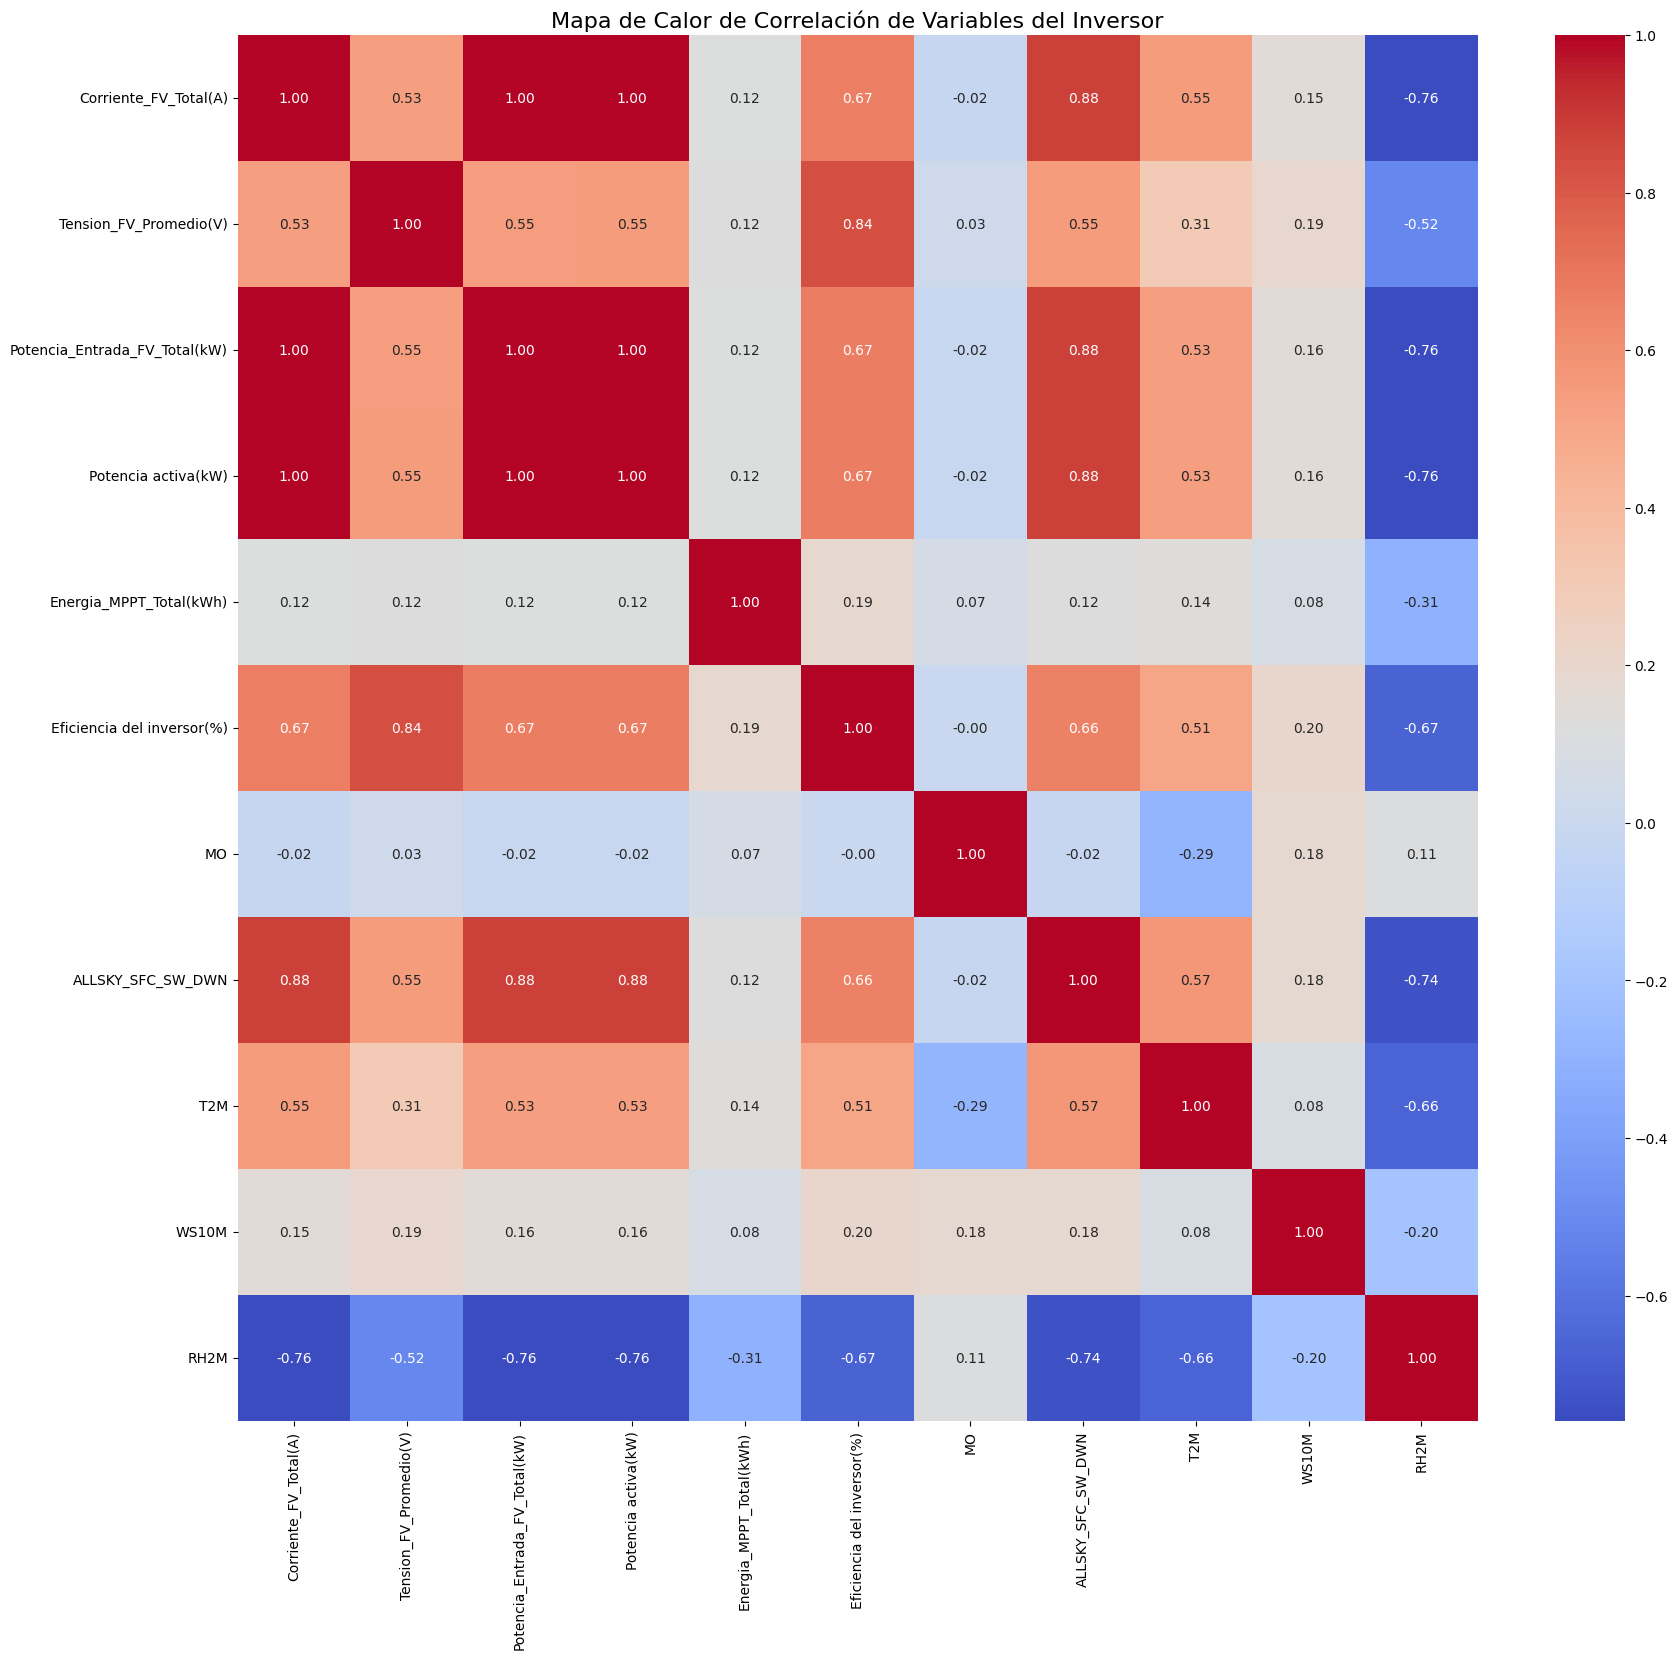

In [2]:
df_final = pd.read_csv('dataset_final.csv')

df_numerico = df_final.select_dtypes(include='number')

# 2. Calcular la matriz de correlación.
# El método .corr() calcula la correlación de Pearson por defecto.
matriz_correlacion = df_numerico.corr()

# 3. Configurar el tamaño del gráfico.
# Puedes ajustar estos números para que el gráfico se vea más grande o más pequeño.
plt.figure(figsize=(20, 18))

# 4. Crear el mapa de calor con Seaborn.
#   - annot=False: No muestra los números dentro de cada celda (recomendado para muchas variables).
#   - cmap='coolwarm': Es un mapa de color ideal para correlaciones (rojo=positivo, azul=negativo).
#   - fmt='.2f': Formatea los números a 2 decimales si activaras las anotaciones.
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f')

# 5. Añadir un título y mostrar el gráfico.
plt.title('Mapa de Calor de Correlación de Variables del Inversor', fontsize=16)
plt.show()

In [3]:
df_final['Hora de inicio'] = pd.to_datetime(df_final['Hora de inicio'])
df_final.set_index('Hora de inicio', inplace=True)
df_final.sort_index(inplace=True)
df_final.columns.to_list()

['Corriente_FV_Total(A)',
 'Tension_FV_Promedio(V)',
 'Potencia_Entrada_FV_Total(kW)',
 'Potencia activa(kW)',
 'Energia_MPPT_Total(kWh)',
 'Eficiencia del inversor(%)',
 'MO',
 'ALLSKY_SFC_SW_DWN',
 'T2M',
 'WS10M',
 'RH2M']

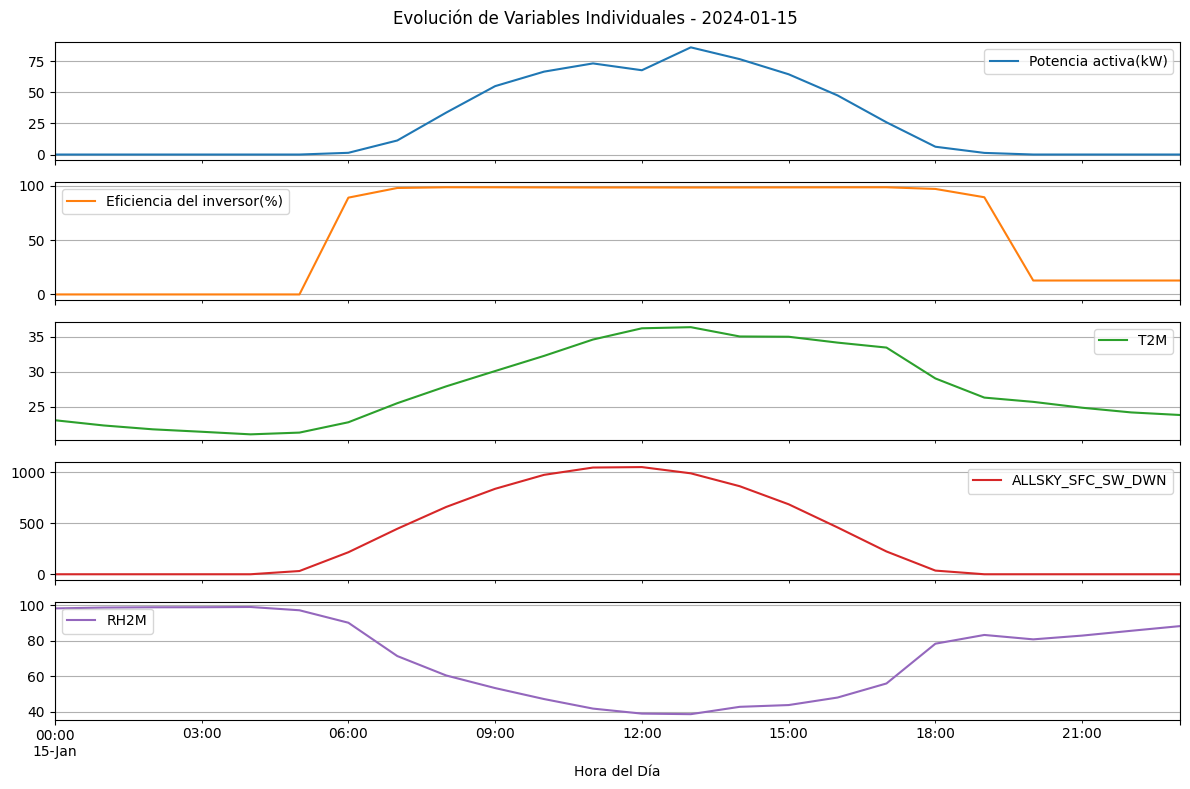

In [4]:
dia_seleccionado = '2024-01-15'

try:
    df_dia = df_final.loc[dia_seleccionado]

    # Columnas que te interesan para el gráfico
    columnas_interes = [
        'Potencia activa(kW)', 
        'Eficiencia del inversor(%)', 
        'T2M', # Usamos el nuevo nombre de la columna de temperatura
        'ALLSKY_SFC_SW_DWN', # Irradiancia
        'RH2M'
    ]
    
    df_dia[columnas_interes].plot(
        subplots=True, 
        layout=(len(columnas_interes), 1),
        figsize=(12, 8), 
        sharex=True,
        grid=True,
        title=f'Evolución de Variables Individuales - {dia_seleccionado}'
    )

    plt.xlabel('Hora del Día')
    plt.tight_layout()
    plt.show()

except KeyError:
    print(f"❌ ERROR: La fecha '{dia_seleccionado}' no se encontró en los datos.")
    print("Por favor, elige una fecha que esté dentro del rango de tu DataFrame.")

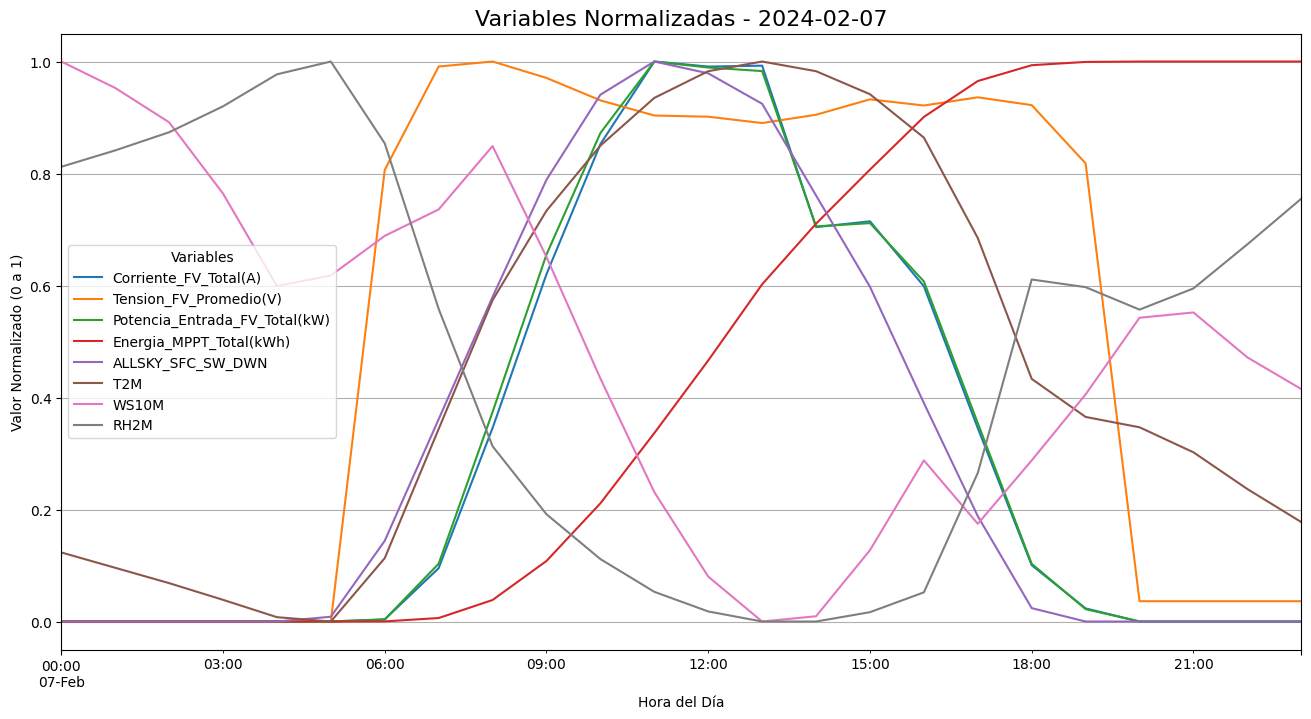

In [5]:
from sklearn.preprocessing import MinMaxScaler

dia_seleccionado = '2024-02-07'

try:
    df_dia = df_final.loc[dia_seleccionado].copy() # Usamos .copy() para evitar advertencias

    # Columnas que te interesan para el gráfico
    columnas_interes = [
        'Corriente_FV_Total(A)',
        'Tension_FV_Promedio(V)',
        'Potencia_Entrada_FV_Total(kW)',
        # 'Potencia activa(kW)',
        'Energia_MPPT_Total(kWh)',
        # 'Eficiencia del inversor(%)',
        'ALLSKY_SFC_SW_DWN',
        'T2M',
        'WS10M',
        'RH2M'
        ]
    
    # --- 1. Seleccionar los datos a normalizar ---
    datos_a_normalizar = df_dia[columnas_interes]

    # --- 2. Normalizar los datos ---
    # Inicializa el escalador
    scaler = MinMaxScaler()
    
    # Aplica el escalado. El resultado es un array de NumPy.
    datos_normalizados = scaler.fit_transform(datos_a_normalizar)
    
    # Convierte el array normalizado de vuelta a un DataFrame,
    # manteniendo el índice de tiempo y los nombres de las columnas.
    df_normalizado = pd.DataFrame(datos_normalizados, 
                                  index=datos_a_normalizar.index, 
                                  columns=datos_a_normalizar.columns)

    # --- 3. Graficar los datos normalizados ---
    df_normalizado.plot(figsize=(16, 8), grid=True)

    # Personaliza el gráfico
    plt.title(f'Variables Normalizadas - {dia_seleccionado}', fontsize=16)
    plt.ylabel('Valor Normalizado (0 a 1)')
    plt.xlabel('Hora del Día')
    plt.legend(title='Variables')
    plt.show()

except KeyError:
    print(f"❌ ERROR: La fecha '{dia_seleccionado}' no se encontró en los datos.")
    print("Por favor, elige una fecha que esté dentro del rango de tu DataFrame.")